### SIR model with diffusion
We are interested in understanding how rabies spreads through a population of healthy foxes. We assume that the disease spreads so fast that we can ignore births and deaths by causes othert than rabies. We also assume that foxes infected by rabies never recover and die with rate $\gamma$ from the disease. Per unit time, a fraction $b$ of contacts between an infected and a healthy fox leads to infection of the healthy fox. Healthy foxes stay in their territory, while infected foxes move around randomly.

These assumptions lead to the SIR model
$$
\begin{align}
S_t & = -bSI \\
I_t & = bSI - \gamma I + D I_{xx}
\end{align}
$$
for the populations $S(x,t)$ and $I(x,t)$ of heaslthy and infected foxes, respectively. Note that we modeled the random movement of infected foxes by diffusion with diffusion constant $D>0$.

If $N$ is the initial population of healthy fixes in the absence of any infected fixes, we can normalize our system by setting
$$x = y\sqrt{D/\gamma}, \quad \tau=\gamma t, \quad s=S/N, \quad i=I/N, \quad R_0=bN/\gamma$$
to obtain the system
$$
\begin{align}
s_\tau & = -R_0 si \\
i_\tau & = R_0 si - i + i_{yy}
\end{align}
$$
where $\tau=1$ corresponds to the mean residence duration $1/\gamma$ of the disease. We will choose an initial condition where we insert a small population of infected foxes at the left end of the domain in an otherwise healthy fox population.

Our goal is to simulate this PDE model. First, we load the necessary Python modules.

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as colors

Next, we define the following functions:

* `discrete_laplacian` provides a centered finite-difference approximation of the second derivative $i_{yy}$;
* `update_solution` uses the forward Euler method to update the solution to the next time step;
* `update_graph` animates the solution.

In [2]:
def discrete_laplacian(u):
    L = -2*u
    L += np.roll(u, -1)
    L += np.roll(u, +1)
    L[0]   = 2*(-u[0]+u[1])
    L[-1] = 2*(-u[-1]+u[-2])
    return L

def update_solution(f1, f2, v1, v2, dt, pars, Nframes, Nskip):
    n = 0
    u1 = f1
    u2 = f2
    v1[0, :] = f1
    v2[0, :] = f2
    d = pars[0]
    R0 = pars[1]
    while n<Nframes:
        n += 1
        for k in range(Nskip):
            up = u1
            u1 += ( -R0*u1*u2 ) * dt
            u2 += ( R0*up*u2 - u2  + d*discrete_laplacian(u2)) * dt
        v1[n, :] = u1
        v2[n, :] = u2
        yield [u1, u2]

def update_graph(U, x, line1, line2):
    line1.set_data(x, U[0][:])
    line2.set_data(x, U[1][:])

In the next cell, we define the parameters of our model, set the initial condition, and run the animation of the solution.

<IPython.core.display.Javascript object>


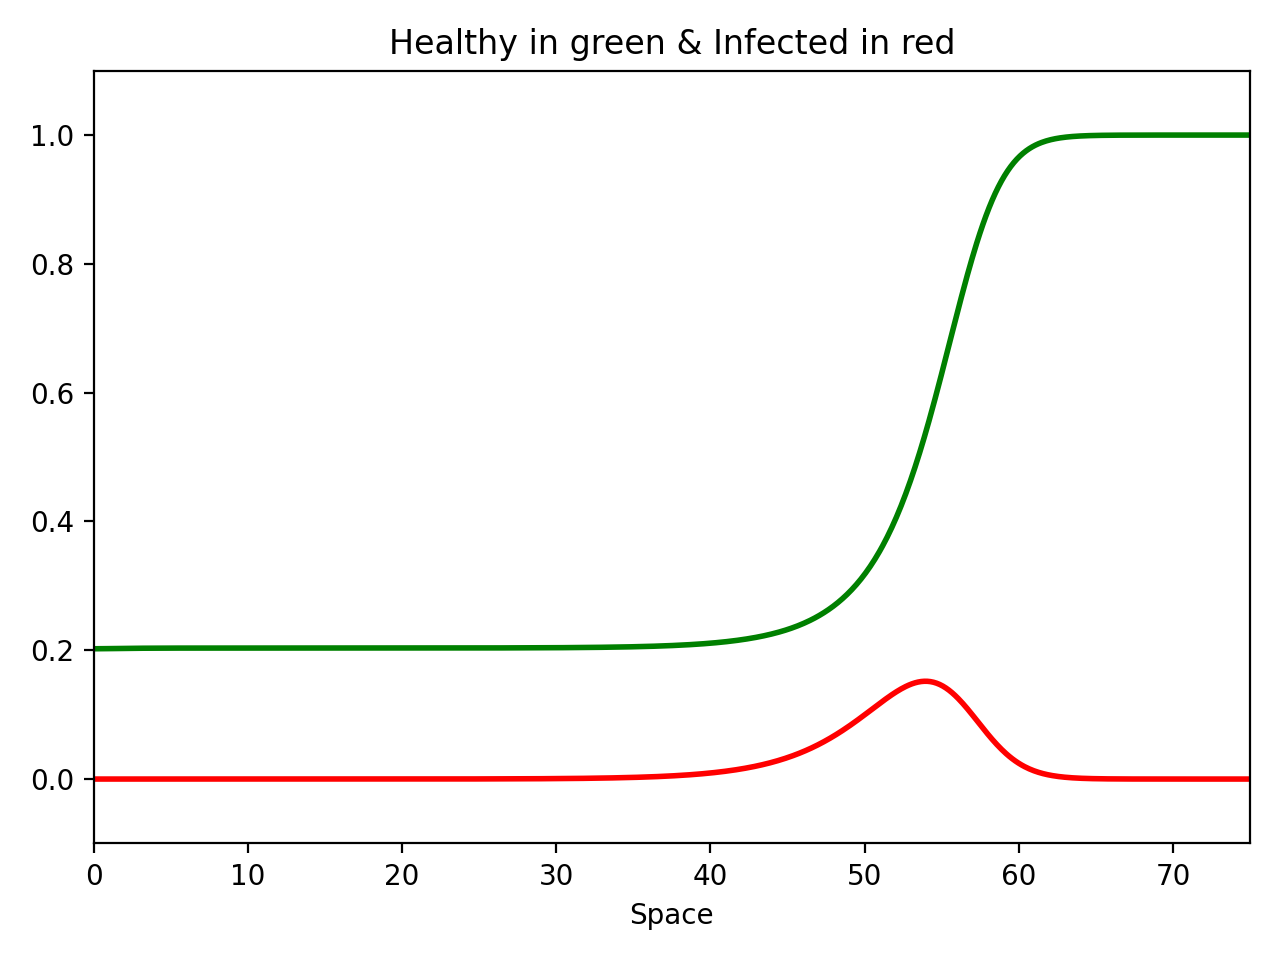

In [3]:
# model parameters
L = 75    # domain length
D = 1     # diffusion coefficient
R0 = 2    # reproduction number

# numerical parameters
N = 750   # grid size

# set initial condition
x = np.linspace(0, L, N)
S0 = 1 + 0*x
I0 = 0.1/np.cosh(x+4.0)

# animation parameters
Nsteps = 8000
Nskip = 25

# set time step to satisfy stability criterion (cfl = D*Δt/Δx^2 < 0.5)
cfl = 0.4
dx = L/(N-1)
dt = cfl * dx**2 / D

# compute and animate solution
Nframes = int(Nsteps/Nskip)
v1 = np.zeros((Nframes, N))
v2 = np.zeros((Nframes, N))
pars = [D/dx**2, R0]

fig = plt.figure()
ax  = plt.axes(xlim=(0,L), ylim=(-0.1, 1.1))
ax.set_title('Healthy in green & Infected in red')
ax.set_xlabel('Space')
line1, = ax.plot([], [], linewidth=2, color = "green")
line2, = ax.plot([], [], linewidth=2, color = "red")

ani = animation.FuncAnimation(fig, update_graph,
                              update_solution(S0, I0, v1, v2, dt, pars, Nframes, Nskip),
                              fargs=(x, line1, line2), interval=5, blit=True, repeat=False)
plt.tight_layout()
plt.show()

Finally, we visualize the solution in a space-time contour plot.

<IPython.core.display.Javascript object>


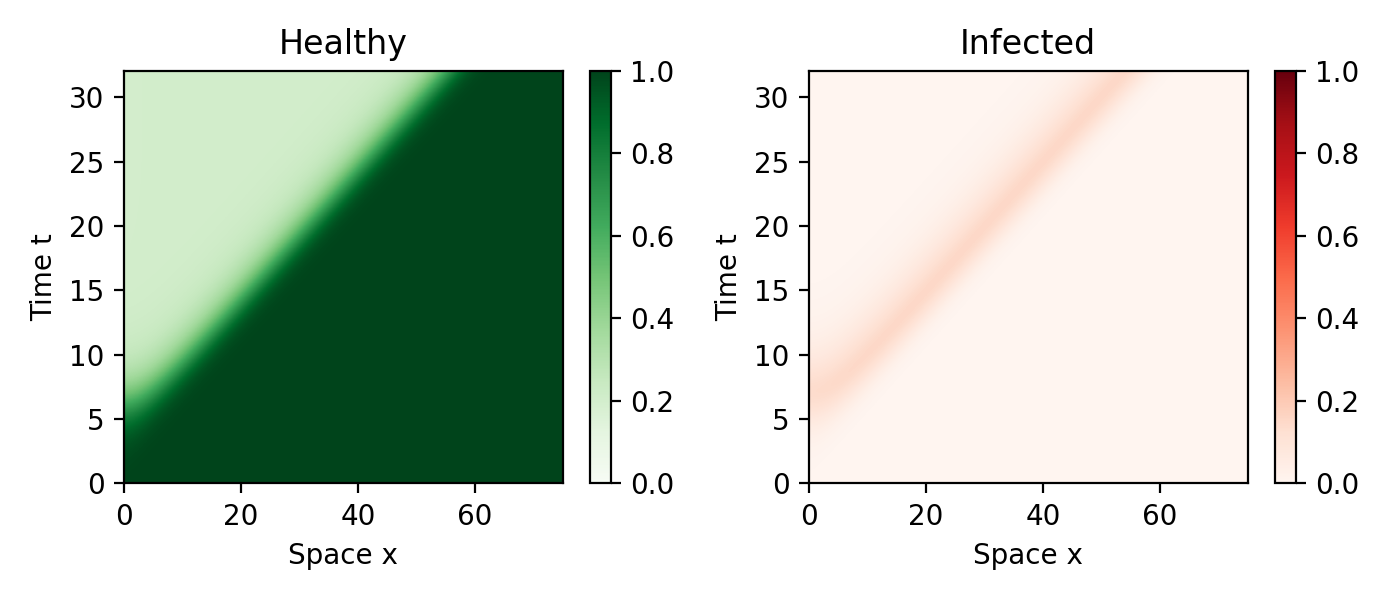

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3))
extent = [0, L, 0, Nsteps*dt]
im0 = ax[0].imshow(v1, cmap=cm.Greens, vmin=0, vmax=1, extent=extent,
                   aspect='auto', origin='lower')
ax[0].set_title('Healthy')
ax[0].set_xlabel('Space x')
ax[0].set_ylabel('Time t')
fig.colorbar(im0, ax=ax[0])
im1 = ax[1].imshow(v2, cmap=cm.Reds, vmin=0, vmax=1, extent=extent,
                   aspect='auto', origin='lower')
ax[1].set_title('Infected')
ax[1].set_xlabel('Space x')
ax[1].set_ylabel('Time t')
fig.colorbar(im1, ax=ax[1])
plt.tight_layout()
plt.show()